In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/dataset/drug-dataset.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY


##EDA (Exploratory Data Analysis)

In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na', 'K', 'Drug'], dtype='object')

In [6]:
df.shape

(200, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB


In [8]:
df.describe()

,Age,Na,K
count,200.000000,200.000000,200.000000
mean,44.315000,0.697095,0.050174
std,16.544315,0.118907,0.017611
min,15.000000,0.500169,0.020022
25%,31.000000,0.583887,0.035054
50%,45.000000,0.721853,0.049663
75%,58.000000,0.801494,0.066000
max,74.000000,0.896056,0.079788


In [9]:
df.nunique()

,0
Age,57
Sex,2
BP,3
Cholesterol,2
Na,200
K,200
Drug,5


In [10]:
df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na,0
K,0
Drug,0


In [11]:
df.duplicated().sum()

0

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Na'}>],
       [<Axes: title={'center': 'K'}>, <Axes: >]], dtype=object)

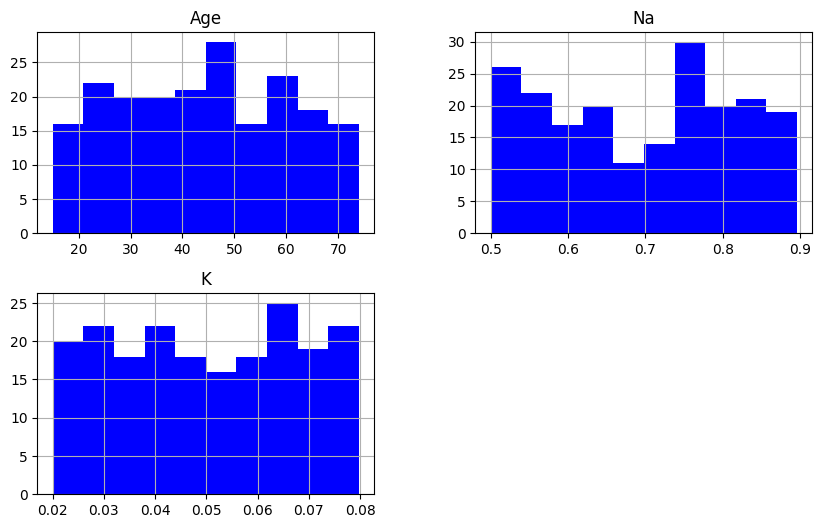

In [12]:
df.hist(figsize=(10,6), color='blue')

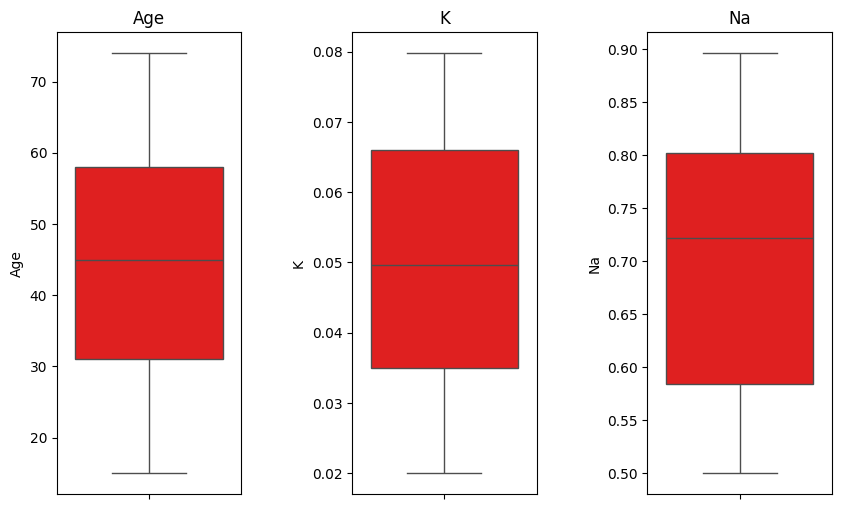

In [27]:
#mencari nilai outlier pada kolom yang tidak bertipe objek
def boxplot(df):
  var = ['Age', 'K', 'Na']
  fig, ax = plt.subplots(1, 3, figsize=(10,6))
  fig.subplots_adjust(hspace=0.6, wspace=0.6)

  for i, var in enumerate(var):
    sns.boxplot(y=var, data=df, color='red', ax=ax[i])
    ax[i].set_title(var)
    ax[i].set_ylabel(var, rotation=90)
  plt.show()

boxplot(df)

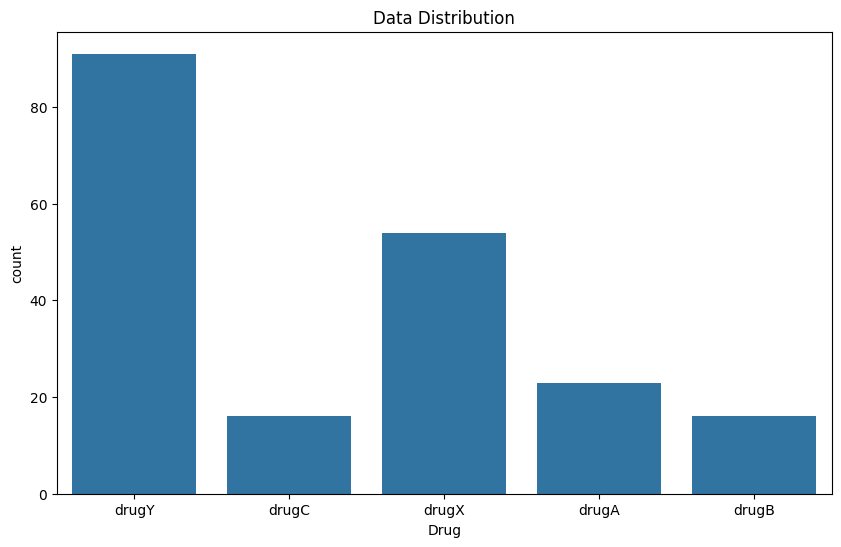

In [31]:
plt.figure(figsize=(10,6))
fig = sns.countplot(x='Drug', data=df)
fig.set_title('Data Distribution')
plt.show()

##Data Pre-Processing


In [34]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,0,0,0,0.792535,0.031258,drugY
1,47,1,1,0,0.739309,0.056468,drugC
2,47,1,1,0,0.697269,0.068944,drugC
3,28,0,2,0,0.563682,0.072289,drugX
4,61,0,1,0,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...
195,56,0,1,0,0.848774,0.073380,drugC
196,16,1,1,0,0.743021,0.061886,drugC
197,52,1,2,0,0.549945,0.055581,drugX
198,23,1,2,1,0.784520,0.055959,drugX


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 11.1+ KB


In [39]:
#memisahkan variable dependen dan independen
x = df.drop(columns='Drug')
y = df['Drug']

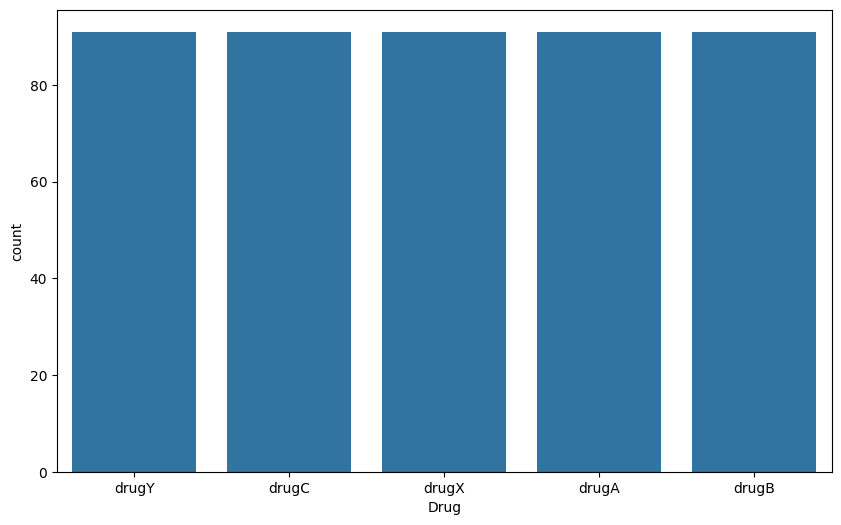

In [52]:
fig = plt.figure(figsize=(10,6))
sm = SMOTE()
x, y = sm.fit_resample(x, y)
sns.countplot(x=y)
plt.show()

In [53]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [54]:
x_train , x_test, y_train, y_test = train_test_split(x, y , test_size=0.2 , random_state=42)

Text(0, 0.5, 'Error Rate')

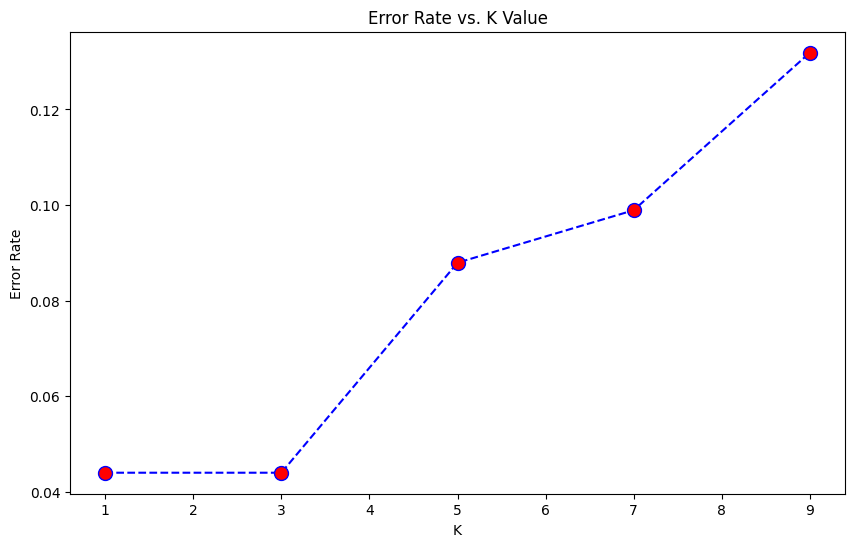

In [55]:
#mencari nilai k yang paling optimal
error_rate = []
i_list = []

for i in range(1, 10):
  if i % 2 != 0:
    i_list.append(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(i_list,error_rate, color='blue', marker='o', linestyle="dashed", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')

##Modeling Data

In [57]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.95      1.00      0.97        18
       drugB       1.00      1.00      1.00        19
       drugC       1.00      1.00      1.00        15
       drugX       0.87      1.00      0.93        20
       drugY       1.00      0.79      0.88        19

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.95        91



<Axes: >

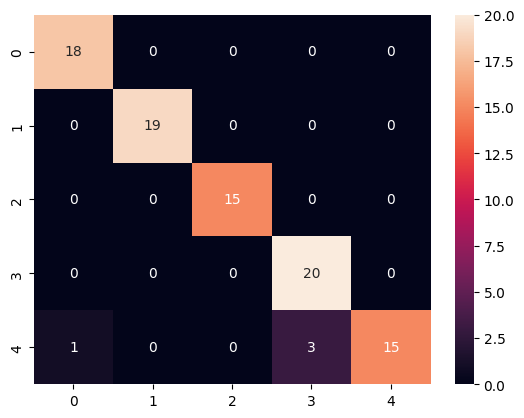

In [58]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')